## __Final Project:__

By: Irene Cui, Aidan Goode, Michael Niero, Keegan Brown, Jacob Kranich

DIDA 325: Data and Society

## __Introduction:__

For this dataset, we are imagining that we are part of Optimum Energy, a company contracted by the department of energy to assist in ensuring that residential buildings meet strict heating and cooling load standards. Our goal is to analyze energy consumption data to identify the most energy-efficient residential building styles and structures. The primary objective is to understand how various building attributes affect energy efficiency and to assess whether energy efficiency can be reliably predicted based on building characteristics.


The dataset we are using was originally compiled by researchers at the UC Irvine, who conducted simulation-based experiments to examine how different residential building characteristics influence energy efficiency. It includes a range of variables related to building structure, materials, orientation, and glazing area, among others, with corresponding heating and cooling loads. While our team was not involved in the original data collection, we are leveraging this dataset to conduct our own analysis. Our approach involves exploring patterns in energy consumption across different building configurations to identify key attributes that contribute to efficiency. We will use statistical analysis and predictive modeling to evaluate whether energy performance can be reliably inferred from these attributes, ultimately aiming to make informed recommendations for optimizing residential building design.

[https://archive.ics.uci.edu/dataset/242/energy+efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency)



### __Research Questions:__

1. Are heating load and cooling load affected to the same extent by different variables (insulation theory), or do some variables differ in their effects (sunlight through windows? etc.)
2. To expand on our first question, how exactly does glazing area distribution factor into heating/cooling load? Do windows in general just hurt efficiency, or do bigger windows also help heat due to sunlight?
3. Are heating and cooling loads fundamentally physically predictable factors, where a simple linear regression serves best to predict outcomes within the limitations of noise, or would machine learning produce more accurate predictions?
4. What does the most optimal building look like for keeping low heating and cooling load? Do these buildings conflict in anyway would prioritizing one thing raise one energy amount but lower the other? Are the most optimized buildings realistic or possible?


## __Importing necessary libraries for analysis:__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
eng = pd.read_csv("https://raw.githubusercontent.com/mniero1/mniero1/refs/heads/main/ENB2012_data.csv")

##__Data:__

### __Naming columns and decription:__

All of the data is numerical and to go through what each column represents

Relative Compactness: This column is the ratio between a buildings surface area and its total volume

Surface Area: This column gives a measurement for the surface area of the building

Wall Area: This column gives a measurement for the surface area of the walls for the building

Roof Area: This column gives a measurement for the surface area of the roof for the building

Overall Height: This column gives a measurement for the height of the building

Orientation: Direction building is facing

Glazing Area: total glazing area (transparent materials such as windows, doors) is distributed across a building's exterior surfaces, influencing energy performance and building design.

Glazing Area Distribution: How much the glazing area of a building is distributed or concentrated across the surface area of the building.

Heating Load: The amount of energy/heating required to keep a building at room tempature during cold weather.

Cooling Load: The amount of energy/cooling required to keep a building at room tempature during hot weather.

In [2]:
eng.columns = ["Relative_Compactness","Surface_Area","Wall_Area","Roof_Area","Overall_Height","Orientation","Glazing_Area","Glazing_Area_Distribution","Heating_Load","Cooling_Load"]
eng.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


Let's check our dataset for any null values.

In [3]:
eng.isna().sum()

,0
Relative_Compactness,528
Surface_Area,528
Wall_Area,528
Roof_Area,528
Overall_Height,528
Orientation,528
Glazing_Area,528
Glazing_Area_Distribution,528
Heating_Load,528
Cooling_Load,528


In [4]:
eng.tail(2)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The last 528 rows of the dataset were all null values so we can drop them. (dataset was in excel sheet format so it originally had NaNs for all the blank rows after our data)

In [5]:
eng = eng.dropna()

In [6]:
eng

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0,16.48,16.61


# __Analysis:__

## __Research Question 1:__

### Are heating load and cooling load affected to the same extent by different variables (insulation theory), or do some variables differ in their effects (sunlight through windows? etc.)



We want to target this question to see how structures comparitively handle heating and cooling load based on the variables given. This question is highly relevant to any investigation of energy efficiency because it gives us a means to investigate the different factors which control overall energy efficiency.

In [7]:
X = eng[["Relative_Compactness","Surface_Area","Wall_Area","Roof_Area","Overall_Height",
         "Orientation",
         "Glazing_Area",
         "Glazing_Area_Distribution"
         ]]
Y1 = eng["Heating_Load"] # or "Cooling Load"

X = sm.tools.tools.add_constant(X)
model = sm.OLS(Y1, X).fit() #Creating a linear regression to try and see effects of different variables
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating_Load   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        02:01:45   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [8]:
predictions = model.predict(X)
hresiduals = Y1 - predictions

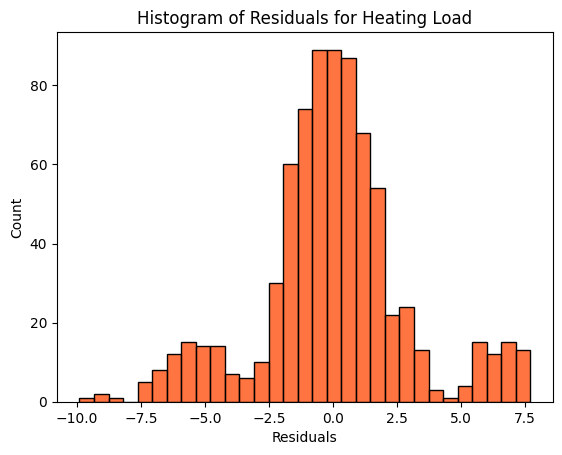

In [9]:
sns.histplot(hresiduals, color= "orangered")
plt.xlabel('Residuals')
plt.title('Histogram of Residuals for Heating Load')
plt.show()

Often our residuals fall within a reasonable amount with a large peak from -2.5 to 2.5 . There does seen to be some types of buildings that the model is overestimating or underestimating heating load by a large amount though.

Based on the linear regression results for heating load, it is clear that different variables have varying levels of influence, indicating that heating and cooling loads are likely affected differently. For instance, Relative Compactness has a strong negative effect on heating load, supporting having insulation in buildings or more compact buildings lose less heat. Glazing Area has a large positive impact, showing that increased window area significantly raises heating demand, likely due to greater heat loss. Wall Area and Overall Height also significantly increase heating load, which corresponds with greater surface exposure leading to more heat loss. In contrast, Orientation has no significant effect, suggesting that the direction a building faces may not strongly influence heating needs, though it might matter more for cooling due to sun exposure. These results imply that while some variables like compactness and glazing impact heating load, others may influence it differently, particularly those related to sunlight and exposure, emphasizing the need to consider both insulation and solar gain when designing for energy efficiency.

In [10]:
#X = eng[["Relative Compactness","Surface Area","Wall Area","Roof Area","Overall Height","Orientation","Glazing Area","Glazing Area Distribution"]]
Y2 = eng["Cooling_Load"]

#X = sm.tools.tools.add_constant(X)
model = sm.OLS(Y2, X).fit() #Making a linear regression for cooling load based off of building characteristics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Cooling_Load   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     859.1
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        02:01:50   Log-Likelihood:                -1979.3
No. Observations:                 768   AIC:                             3975.
Df Residuals:                     760   BIC:                             4012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

The linear regression results for cooling load reveal a pattern that differs somewhat from heating load, indicating that various factors impact the two energy demands in distinct ways. Like heating load, Relative Compactness shows a strong negative effect on cooling load, confirming that insulation in compact buildings exchange less heat with the environment. However, Glazing Area, while still highly significant, has a smaller coefficient for cooling load (+14.72) compared to heating load (+19.93), suggesting that although windows contribute to internal heat gain from sunlight, their influence on cooling is somewhat less than their role in heat loss. Glazing Area Distribution, which was significant in the heating model, is not significant here, implying that how window space is distributed may matter less for cooling. Wall Area and Overall Height still positively impacted cooling load, though Wall Area has a smaller effect size than in the heating model. Orientation remains statistically insignificant, further suggesting it doesn’t play a major role in either thermal load, despite potential assumptions about sun exposure. Overall, while core insulation-related variables like compactness and height affect both heating and cooling similarly, features related to sunlight exposure (like glazing distribution) appear to affect heating more than cooling, supporting the idea that thermal losses and solar gains influence the two types of loads in different ways.

In [11]:
predictions = model.predict(X) #Setting up residuals for the visual
cresiduals = Y2 - predictions

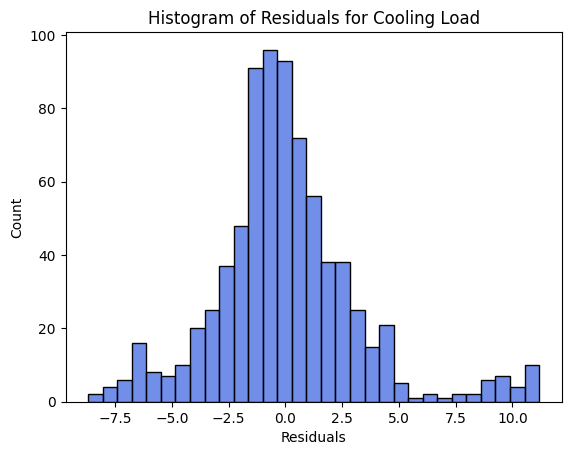

In [12]:
sns.histplot(cresiduals, color = "royalblue")
plt.xlabel('Residuals')
plt.title('Histogram of Residuals for Cooling Load') #Visualing residuals to look at error in model
plt.show()

After running residuals we can observe a few things. First our residuals comply with the rules of normality. Now with the residuals themselves. While most of the results are center around zero there are still some buildings where cooling load is being severely under or over estimated.

## __Research Question 2:__
### To expand on our first question, how exactly do glazing area distribution and orientation factor into heating/cooling load?

This question splits off from question 1, in investigating the effects of two different variables which had small influences on heating and cooling loads. These factors also had high P>T values, indicating that they affected the linear regression unpredictably, which could mean they were entirely unconnected to the results, but could also mean they were presented in such a way as to obsuce their influence on the heating and cooling loads, ie. through effectively being categorical variables despite being presented as integers.

Text(0.5, 1.0, 'Variation of Heating Load for Buildings with Various Glazing Area Distributions')

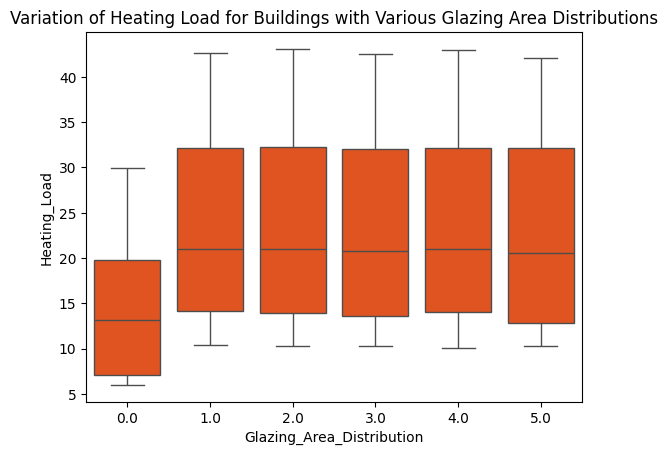

In [13]:
sns.boxplot(eng, x="Glazing_Area_Distribution",y="Heating_Load", color= "orangered")
plt.title('Variation of Heating Load for Buildings with Various Glazing Area Distributions') #Checking different categories for glazing area distribution and their Heating load values

Text(0.5, 1.0, 'Variation of Cooling Load for Buildings with Various Glazing Area Distributions')

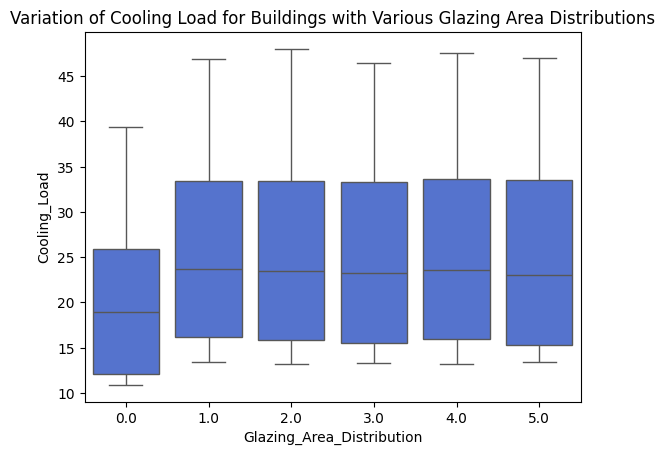

In [14]:
sns.boxplot(eng, x="Glazing_Area_Distribution",y="Cooling_Load", color = "royalblue")
plt.title('Variation of Cooling Load for Buildings with Various Glazing Area Distributions')  #Checking different categories for glazing area distribution and their cooling load values

Text(0.5, 1.0, 'Variation of Glazing Area for Buildings with Various Glazing Area Distributions')

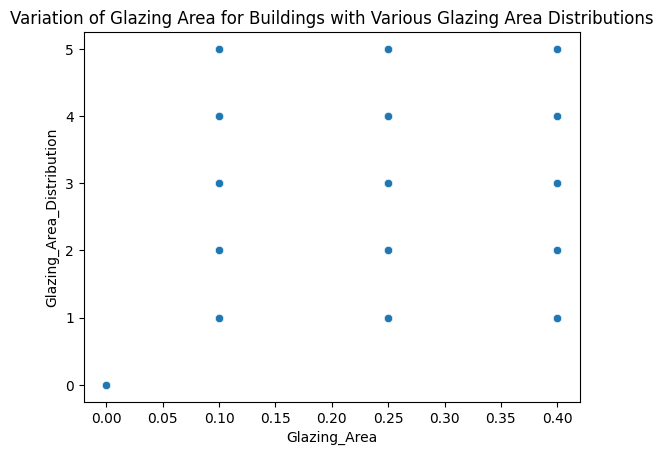

In [15]:
sns.scatterplot(eng, x="Glazing_Area",y="Glazing_Area_Distribution")
plt.title('Variation of Glazing Area for Buildings with Various Glazing Area Distributions') #Checking to see if different glazing area distributions have the same amount of glazing area

It appears that glazing area distribution is only 0 when glazing area itself is 0, while having no statistical significance at other values, meaning that while there is a real correlation, glazing area distribution adds no real data to the dataset.

Text(0.5, 1.0, 'Variation of Heating Load for Buildings with Orientations')

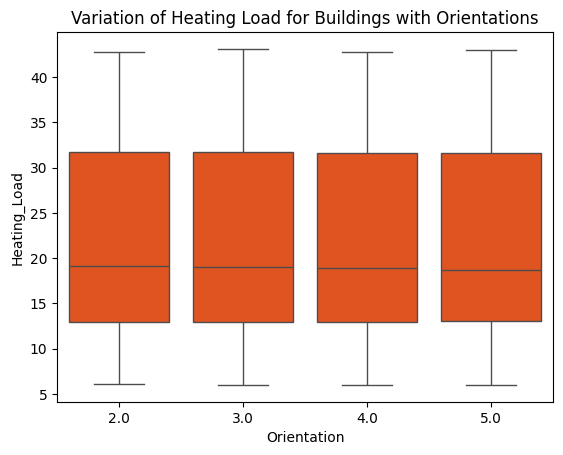

In [16]:
sns.boxplot(eng, x="Orientation",y="Heating_Load", color = "orangered")
plt.title('Variation of Heating Load for Buildings with Orientations')

Text(0.5, 1.0, 'Variation of Cooling Load for Buildings with Orientations')

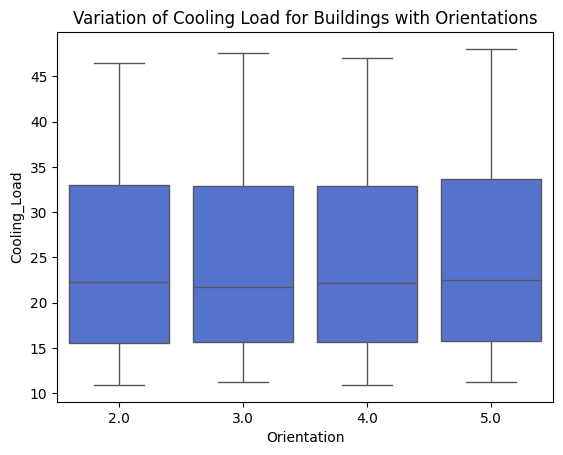

In [17]:
sns.boxplot(eng, x="Orientation",y="Cooling_Load", color = "royalblue")
plt.title('Variation of Cooling Load for Buildings with Orientations')

By contrast, orientation appears entirely uncorrelated to heating and cooling loads.

Most of the data correlating glazing area distribution to cooling and heating load showed little variation, however, the glazing area distribution is the same for 1-4. This implies that any amount of glazing area will decrease efficiency. In general any window or features alike, will increase the heating and cooling load as they lack proper insulation. As in the summer windows allow cool air to escape and they increase temperature via sunlight. We can also assume that as glazing area distribution as in the 4-5 range, that we see design adjustments in structures (better insulation), to compensate for high glazing area, but this could be speculation.

## __Research Question 3:__

### Are heating and cooling loads fundamentally physically predictable factors, where a simple linear regression serves best to predict outcomes within the limitations of noise, or would machine learning produce more accurate predictions?

In [18]:
X4=eng[["Relative_Compactness", "Surface_Area", "Wall_Area","Roof_Area", "Overall_Height", "Orientation", "Glazing_Area", "Glazing_Area_Distribution"]]
y4 = eng["Heating_Load"]
feature_names = X4.columns.tolist()
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size= .25, random_state=314159)
model4 = RandomForestRegressor().fit(X4_train, y4_train) #Setting up a machine learning model to predict heating load
predictions = model4.predict(X4)
mse = mean_squared_error(y4, predictions)
r2 = r2_score(y4,predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}") #Checking model accuracy to compare it to the linear regression model

Mean Squared Error: 0.07279834535156314
R-squared: 0.9992840409508227


As we can see the R-squared is almost 1.00 meaning that Heating Load is extremely predictable by using the characteristics of a building. This R-squared is also higher than the R-squared for the linear regression model which was about .91 making machine learning much more suited for predicting heating load for buildings

In [19]:
importances = model4.feature_importances_
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Gini Importance': importances
})
feature_imp_df = feature_imp_df.sort_values('Gini Importance', ascending=False) #Seeing what characteristics of a building are most important in the model/to heating load
print(feature_imp_df)

                     Feature  Gini Importance
0       Relative_Compactness         0.389388
4             Overall_Height         0.244305
1               Surface_Area         0.134572
3                  Roof_Area         0.104120
6               Glazing_Area         0.076972
2                  Wall_Area         0.035336
7  Glazing_Area_Distribution         0.014516
5                Orientation         0.000791


It seems the most important determiners of heating load are Relative_Compactness,Overall Height, and Surface Area. This is very similar to the most important determiners in our linear regression model for heating load. The major difference comes into plays with glazing area which was very important in our linear regression model but isnt as important in the machine learning model.

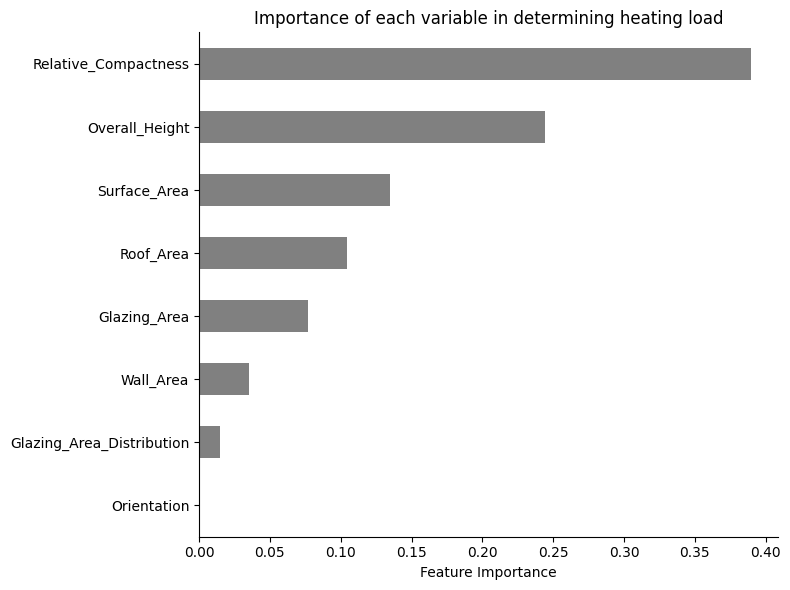

In [20]:
forest_importances = pd.Series(model4.feature_importances_,index=feature_names)
forest_importances.sort_values(inplace=True, ascending=True) #Creating a visual to show the importance of each buidling characteristic to the model

fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.barh(ax=ax, color='grey')
ax.set_xlabel("Feature Importance")
plt.title('Importance of each variable in determining heating load')

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

In [21]:
y4hat_train = model4.predict(X4_train)
y4hat_test = model4.predict(X4_test)

print(f"Train MSE: {mean_squared_error(y4hat_train, y4_train):.2f}")
print(f"Test MSE: {mean_squared_error(y4hat_test, y4_test):.2f}")
print(f"Train R^2:  {r2_score(y4hat_train, y4_train):.2f}")
print(f"Test R^2:  {r2_score(y4hat_test, y4_test):.2f}")

Train MSE: 0.04
Test MSE: 0.18
Train R^2:  1.00
Test R^2:  1.00


Overall the model seems to be extremely accurate even with data it is untrained against. The test R-squared is somewhat concering being at 1.00 . This could suggest that the model is overfitting to the type of data in the data table. It would be something to consider for others or ourselves in the future to test this model against new data. Even with this concern it is clear from this research that machine learning is the prime choice for predicting heating load when only accuracy is a concern as expected.

In [22]:
X5=eng[["Relative_Compactness", "Surface_Area", "Wall_Area","Roof_Area", "Overall_Height", "Orientation", "Glazing_Area", "Glazing_Area_Distribution"]]
y5 = eng["Cooling_Load"]
feature_names = X5.columns.tolist()
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size= .25, random_state=314159)
model5 = RandomForestRegressor().fit(X5_train, y5_train) #Setting up a similar machine learning model to predict cooling load using all the same variables from the previous model
predictions5 = model5.predict(X5)
mse = mean_squared_error(y5, predictions5)
r2 = r2_score(y5, predictions5)
print(f"Mean Squared Error: {mse}") #Checking accuracy
print(f"R-squared: {r2}")

Mean Squared Error: 1.0131868676302132
R-squared: 0.988790338054424


While a little bit less accurate than the model for heating load similar to how the models for linear regression were it is still much more accurate than the linear regression model for cooling load. With an R-squared of just under .99 it is extremely accurate and more accurate than the .888 R-squared value for the linear regression model for cooling load.

In [23]:
importances = model5.feature_importances_
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Gini Importance': importances
})
feature_imp_df = feature_imp_df.sort_values('Gini Importance', ascending=False) #Checking the importance of each variable to the model
print(feature_imp_df)

                     Feature  Gini Importance
0       Relative_Compactness         0.366695
4             Overall_Height         0.259826
1               Surface_Area         0.162304
3                  Roof_Area         0.092657
6               Glazing_Area         0.047876
2                  Wall_Area         0.041885
7  Glazing_Area_Distribution         0.017460
5                Orientation         0.011297


The ranking for importance is again very similar to all the other models just the values for importance are slightly different most notably in Overall_Height which is deemed notably important in predicting cooling load vs heating load. Regardless of this the importance of variables in both models are more similar than different which is interesting to note. This information combined with the overall similarness of the coefficients for the two linear regression models points to the idea that there are building practices which make buildings more efficient overall(heating and cooling) and practices that make buildings overall more unefficient. This will be expanded on more in research question 4

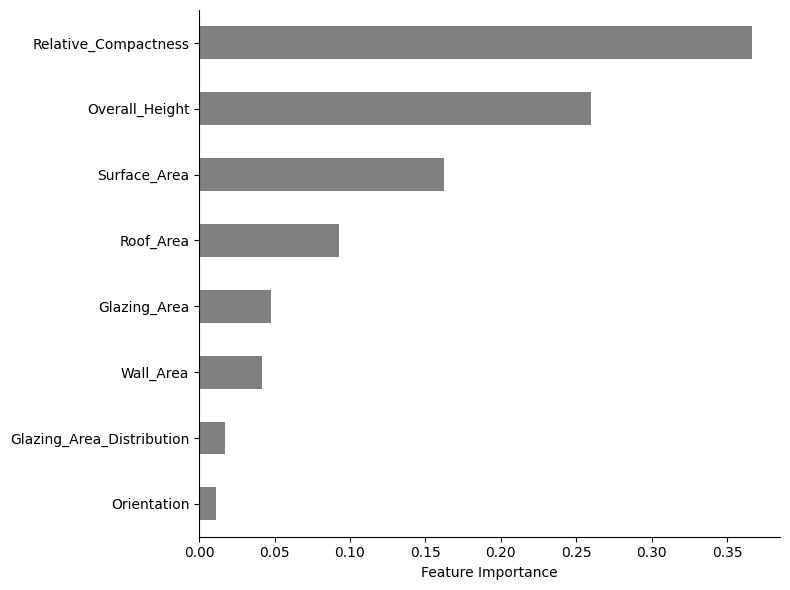

In [24]:
forest_importances = pd.Series(model5.feature_importances_,index=feature_names)
forest_importances.sort_values(inplace=True, ascending=True) #Making a visual for the importance of each variable in the model

fig, ax = plt.subplots(figsize=(8, 6))
forest_importances.plot.barh(ax=ax, color='grey')
ax.set_xlabel("Feature Importance")


ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

In [25]:
y5hat_train = model5.predict(X5_train)
y5hat_test = model5.predict(X5_test)

print(f"Train MSE: {mean_squared_error(y5hat_train, y5_train):.2f}")
print(f"Test MSE: {mean_squared_error(y5hat_test, y5_test):.2f}") #Checking the accuracy of the machine learning model against unused data
print(f"Train R^2:  {r2_score(y5hat_train, y5_train):.2f}")
print(f"Test R^2:  {r2_score(y5hat_test, y5_test):.2f}")

Train MSE: 0.41
Test MSE: 2.81
Train R^2:  1.00
Test R^2:  0.97


While less accurate than heating load and maybe overfitting just a small amount the model still looks really good. This may even be an over critical evaluation due to how accurate the heating load model is. Similar to heating models though we can confirm that machine learning is the best way of evaluating cooling loads for building based off building characteristics when accuracy is the number one priority.

## __Research Question 4:__

### What does the most optimal building look like for keeping low heating and cooling load? Do these buildings conflict in anyway would prioritizing one thing raise one energy amount but lower the other? Are the most optimized buildings realistic or possible?




According to the linear regression from problem 1 the factors that we want to keep lower for heating load and cooling load are wall area, overall height and glazing area. This makes sense as the larger they get the larger the building is and the more energy is needed to keep the building at a reasonable temperature. We also want to keep glazing area distribution low as it causes an increase but is less statistically significant espicially for cooling load. For both variables we want to increase relative compactness, surface area, and roof area. Next lets look at the min and max values the data set has for each variable as well as use the loc function to find the lowest and highest values for heating and cooling load.

In [26]:
eng.describe() #Looking at the min and max values for each building variable to see where the most effecient and least efficient structures for heating and cooling load fall within this range

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [27]:
eng_rq4_HLmax = eng.loc[eng.Heating_Load < 6.03 ]
eng_rq4_HLmax #looking at the characteristics of the most effecient heating load structure

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
26,0.74,686.0,245.0,220.5,3.5,4.0,0.0,0.0,6.01,10.94


As expected wall area, overall_height and glazing area are at their minimums which is what is predicted by the coefficients of the linear regression models. Roof area is also at its max value which is what is expected. Relative compactness isnt just not at its max its not even past the mean this very much goes against what is precicted by the linear regression model and common sense that less volume and good insulation would make more effecient buildings. On top of this surface area is also only around the mean and not at the max which goes against the predicted effect it would have on efficiency.

In [28]:
eng_rq4_HLmax = eng.loc[eng.Heating_Load > 43 ]
eng_rq4_HLmax #Looking at the charateristics of the least efficient heating load structure

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
593,0.79,637.0,343.0,147.0,7.0,3.0,0.4,2.0,43.1,39.41


Opposite of all the characteristics above except for the ones that we already noted broke the expected trend. Relative compactness is higher than the most effecient building this is something we need to look into. Surface area is also just slightly below the mean and not at the minimum.

In [29]:
eng_rq4_CLmin = eng.loc[eng.Cooling_Load < 10.93 ]
eng_rq4_CLmin

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
24,0.74,686.0,245.0,220.5,3.5,2.0,0.0,0.0,6.07,10.9


Almost identical confirmations of our original hypothesis and points that go against it.

In [30]:
eng_rq4_CLmax = eng.loc[eng.Cooling_Load > 48 ]
eng_rq4_CLmax

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
595,0.79,637.0,343.0,147.0,7.0,5.0,0.4,2.0,41.92,48.03


Same concerns and succsesses as for the heating load structures.

To compare to our original hypothesis we do see that the most energy efficient areas have low wall area and a low overall height. They also have no glazing area which means no windows or doors(not very realistic). The reverse is true for all the poor energy efficiency buildings. On top of this our hypothesis was also correct in the idea that the buildings with the largest roof area and relatively large surface area would be energy efficient. The two biggest areas where the original hypothesis was incorrect atleast slightly is in surface area and majorly in relative compactness. As we can see while the most energy efficient buildings have a larger surface area than the average they are not even in the top 25% of buildings why is this? On top of this the unefficient buildings actually had higher relative compactness than the efficient buildings lets look into both of these

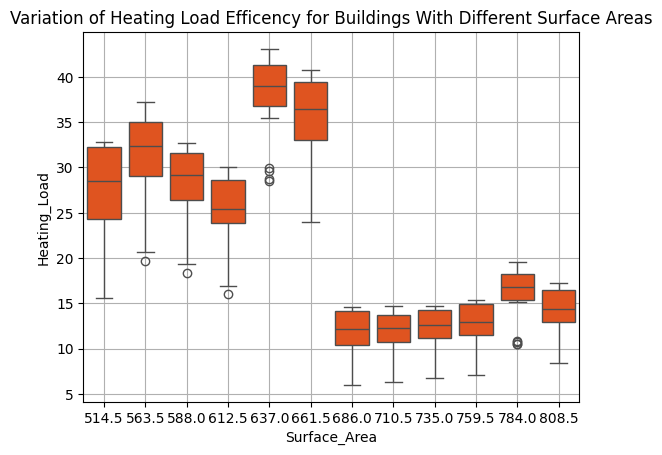

In [31]:
sns.boxplot(eng, x = "Surface_Area", y = "Heating_Load", color = "orangered")
plt.title('Variation of Heating Load Efficency for Buildings With Different Surface Areas')
plt.grid()
plt.show() #Looking at range of effectiveness for different buildings with the same surface areas

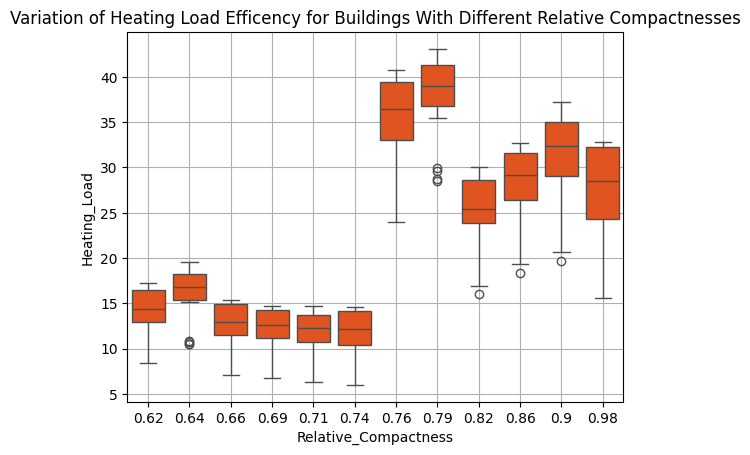

In [32]:
sns.boxplot(eng, x = "Relative_Compactness", y = "Heating_Load", color = "orangered")
plt.title('Variation of Heating Load Efficency for Buildings With Different Relative Compactnesses')
plt.grid()
plt.show() #Looking at range of effectiveness in heating load for different buildings with the same relative compactness

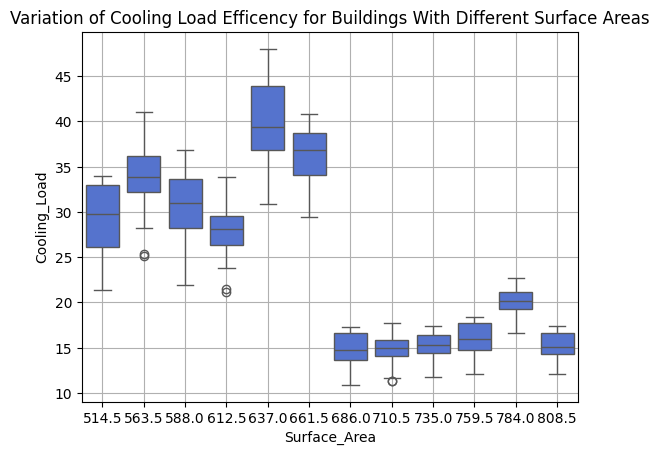

In [33]:
sns.boxplot(eng, x = "Surface_Area", y = "Cooling_Load", color = "royalblue")
plt.title('Variation of Cooling Load Efficency for Buildings With Different Surface Areas')
plt.grid()
plt.show() #Looking at range of effectiveness in cooling loads for different buildings with the same surface areas

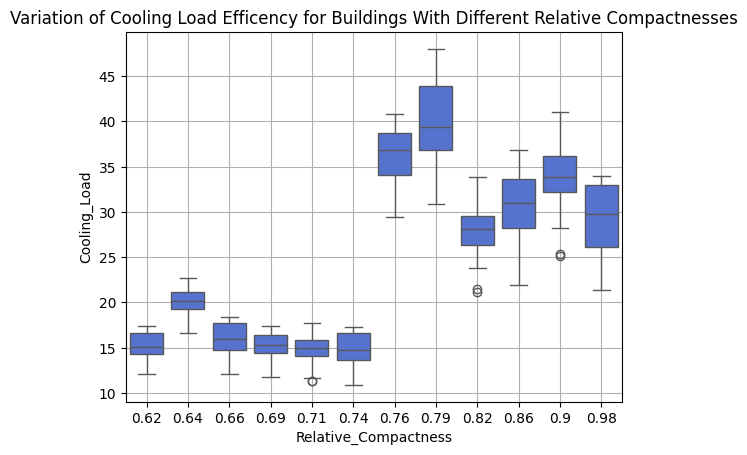

In [34]:
sns.boxplot(eng, x = "Relative_Compactness", y = "Cooling_Load", color = "royalblue")
plt.title('Variation of Cooling Load Efficency for Buildings With Different Relative Compactnesses')
plt.grid()
plt.show() #Looking at range of effectiveness in cooling load for different buildings with the same relative compactness

As we can see Heating and Cooling load spikes after .74 relative compactness and raises after surface area goes above 686. Lets look at buildings .76 relative compactness and at buildings with surface area around 710-784 to see if there is an outside reason for this. Still the difference for energy efficiency from surface area from 686-808.5 is not that different suggesting that usually more surface area is better for efficiency but relative compactness is more interesting/concerning.

In [35]:
eng_rq4_RC = eng.loc[eng.Relative_Compactness == .76 ]
eng_rq4_RC #Are all buildings with .76 relative compactness or above 7 feet instead of 3.5? This would explain the massive jump when it should be decreasing

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
20,0.76,661.5,416.5,122.5,7.0,2.0,0.0,0.0,24.77,29.79
21,0.76,661.5,416.5,122.5,7.0,3.0,0.0,0.0,23.93,29.68
22,0.76,661.5,416.5,122.5,7.0,4.0,0.0,0.0,24.77,29.79
23,0.76,661.5,416.5,122.5,7.0,5.0,0.0,0.0,23.93,29.40
68,0.76,661.5,416.5,122.5,7.0,2.0,0.1,1.0,32.96,33.87
...,...,...,...,...,...,...,...,...,...,...
695,0.76,661.5,416.5,122.5,7.0,5.0,0.4,4.0,40.11,40.77
740,0.76,661.5,416.5,122.5,7.0,2.0,0.4,5.0,38.82,39.37
741,0.76,661.5,416.5,122.5,7.0,3.0,0.4,5.0,39.72,39.80
742,0.76,661.5,416.5,122.5,7.0,4.0,0.4,5.0,39.31,37.79


In [36]:
eng_rq4_RC_Test = eng.loc[eng.Relative_Compactness > .75 ].loc[eng.Overall_Height == 3.5]
eng_rq4_RC_Test #All buildings with Relative compactness above .75 are above 3.5 feet tall with height being a major factor of heating and cooling load

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load


As we can see as relative compactness reaches a certain threshold other building characteristics that cause higher heating and cooling loads like height go up and do not go back down to lower values which causes more efficient buildings. Whether this is a limitation of the data set or an actual effect of high compactness on buildings is not possible to determine. All that We can note from the current data is before the change in building characteristics at relative compactness .76 there was a slight decrease in the amount of energy needed to heat or cool buildings from relative compactness in the range of .64 to .74 which points to the idea that it is a good building practice as long as other important energy effecieint traits can also be mantained.

In [37]:
eng_rq4_SA_Test = eng.loc[eng.Surface_Area == 784] #Checking to see why surface area spikes at this point/why this surface area goes against trend
eng_rq4_SA_Test

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
40,0.64,784.0,343.0,220.5,3.5,2.0,0.0,0.0,10.85,16.78
41,0.64,784.0,343.0,220.5,3.5,3.0,0.0,0.0,10.54,16.80
42,0.64,784.0,343.0,220.5,3.5,4.0,0.0,0.0,10.77,16.75
43,0.64,784.0,343.0,220.5,3.5,5.0,0.0,0.0,10.56,16.67
88,0.64,784.0,343.0,220.5,3.5,2.0,0.1,1.0,15.41,19.37
...,...,...,...,...,...,...,...,...,...,...
715,0.64,784.0,343.0,220.5,3.5,5.0,0.4,4.0,18.84,22.49
760,0.64,784.0,343.0,220.5,3.5,2.0,0.4,5.0,17.69,20.82
761,0.64,784.0,343.0,220.5,3.5,3.0,0.4,5.0,18.19,20.21
762,0.64,784.0,343.0,220.5,3.5,4.0,0.4,5.0,18.16,20.71


In [38]:
eng_rq4_SA_Test.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,6.400000e+01,64.0,64.0,64.0,64.0,64.000000,64.000000,64.000000,64.000000,64.000000
mean,6.400000e-01,784.0,343.0,220.5,3.5,3.500000,0.234375,2.812500,16.615312,20.227187
std,3.356999e-16,0.0,0.0,0.0,0.0,1.126872,0.134186,1.562202,2.115468,1.409444
min,6.400000e-01,784.0,343.0,220.5,3.5,2.000000,0.000000,0.000000,10.540000,16.670000
25%,6.400000e-01,784.0,343.0,220.5,3.5,2.750000,0.100000,1.750000,15.355000,19.320000
50%,6.400000e-01,784.0,343.0,220.5,3.5,3.500000,0.250000,3.000000,16.850000,20.200000
75%,6.400000e-01,784.0,343.0,220.5,3.5,4.250000,0.400000,4.000000,18.257500,21.145000
max,6.400000e-01,784.0,343.0,220.5,3.5,5.000000,0.400000,5.000000,19.520000,22.730000


In [39]:
eng_rq4_SA_Test1 = eng.loc[eng.Surface_Area == 686]
eng_rq4_SA_Test1.describe() #Seeing ways in which these buildings are different from buildings with a surface area of 784

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,6.400000e+01,64.0,64.0,64.0,64.0,64.000000,64.000000,64.000000,64.000000,64.000000
mean,7.400000e-01,686.0,245.0,220.5,3.5,3.500000,0.234375,2.812500,11.886719,14.809844
std,1.119000e-16,0.0,0.0,0.0,0.0,1.126872,0.134186,1.562202,2.214471,1.659840
min,7.400000e-01,686.0,245.0,220.5,3.5,2.000000,0.000000,0.000000,6.010000,10.900000
25%,7.400000e-01,686.0,245.0,220.5,3.5,2.750000,0.100000,1.750000,10.387500,13.592500
50%,7.400000e-01,686.0,245.0,220.5,3.5,3.500000,0.250000,3.000000,12.140000,14.785000
75%,7.400000e-01,686.0,245.0,220.5,3.5,4.250000,0.400000,4.000000,14.172500,16.577500
max,7.400000e-01,686.0,245.0,220.5,3.5,5.000000,0.400000,5.000000,14.610000,17.320000


Similar to relative compactness it seems like buildings with higher surface area, specifically 784 in this case as all other high surface area buildings have relatively similar heating loads and cooling loads tend to have other building characteristics that cause high heating and cooling loads. Again wether this is due to a limitation of the data or is due to buildings with this surface size tending to have other characteristics that raise heating and cooling load is unclear. Similar to relative compactness though there is a clear trend in the box plot that buildings with a surface area of 686 or higher have much lower heating and cooling load values than those below that value suggesting that higher surface areas are good for energy efficiency.

Overall it seems like the relationships in our linear regression models are accuarate and that building practices that are good for keeping a low heating load are also good for keeping cooling load low. This also applies to building practices that raise heating and cooling load. This means that buildings should try to have as little wall area,height and glazing area as possible. While it is for obvious reasons not possible to have 0 for any of these or even extremely low numbers its something people should try to minimize if they want energy efficient buildings. On top of this we want as large of a roof area as possible. With relative compactness and surface area their isnt as clear as an answer but from our research we can suggest that a high relative compactness is good for energy efficiency as long as other factors like height and wall area can still be kept low. This makes sense as a higher relative compactness means less volume to heat or cool and better insulation. Similar to relative compactness surface area is a bit more unclear but we do see that buildings with higher surface areas tend to have much lower heating and cooling load values than buildings with low surface areas as long as other energy efficiency building practices can be maintained like wall area being kept low.

##Conclusions

In conclusion we found that heating load and cooling load are fairly predictable by many models with linear regression models giving a less accurate prediction but more of an insight into what building characteristics do and do not affects heating load and cooling load versus machine learning which gave a more accurate prediction but wasnt as helpful in finding good building characteristics for low and therefore more efficient heating and cooling loads. On top of this, we were able to analyze that glazing distribution and orientation do not have a large effect on heating and cooling load, even with glazing distribution having a somewhat low p-score for predicting heating load in the linear regression. With various visualizations, we were able to show that glazing distribution only had a large effect on the heating and cooling loads when there was zero glazing area. If there was any glazing area at all, it didn't matter how it was distributed, and the mean and range of building efficiencies remained about the same very similarly to all building orientations. Finally, using our linear regression models and data analysis, we were able to look into the most efficient buildings and see what the most optimal building looks like, determining that the trends in our linear regression models were correct and that the most optimal buildings minimize height, wall area, and glazing area and keep surface area and roof area high with somewhat inconclusive results with relative compactness. For future experiments and limitations, we would like to eliminate, most notably, there were some limits in the data, with some styles of buildings missing, for example, buildings with a short height and wall area but a high relative compactness. On top of this, more questions could be asked if we had buildings with different materials or if we had buildings in different climates and temperatures around the world. Overall, we were able to answer the data questions to the best of our abilities, with almost all parts of each question being able to be answered successfully.